In [18]:
import pandas as pd
import numpy as np
import os
import scipy.sparse
import matplotlib.pyplot as plt

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
%cd /content/drive/MyDrive/Matrix
%ls *.xlsx

/content/drive/MyDrive/Matrix
para.xlsx


In [22]:
dir_file = os.getcwd() # returns path to current directory
files_dir = os.listdir(dir_file)  # list of files in current directory
xlsx_files = [f for f in files_dir if f.endswith('xlsx')]
print(xlsx_files)
para_file = xlsx_files[0]

data = pd.read_excel(para_file)
print(data.columns)  # the columns
print(data.shape)

['para.xlsx']
Index(['x1', 'x2', 'y'], dtype='object')
(100, 3)


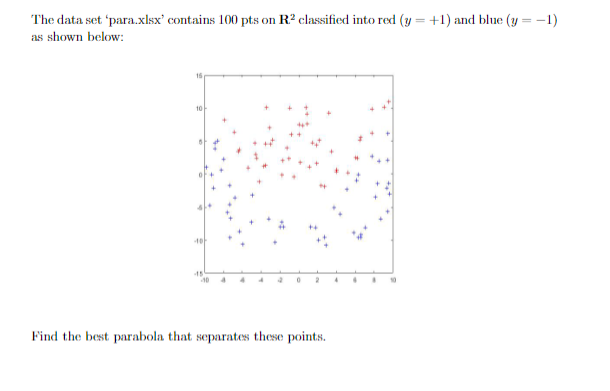

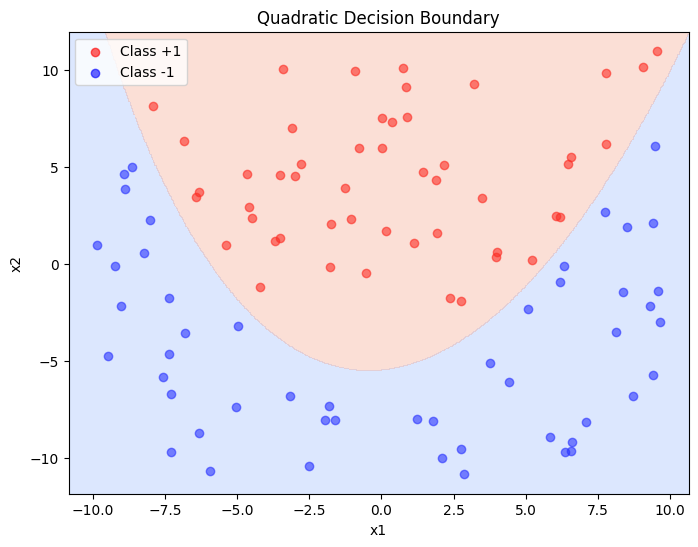

In [23]:
# Extract features and labels
X = data[['x1', 'x2']].values
y = data['y'].values

# Transform features to include polynomial terms (quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit a logistic regression model with the polynomial features
model = LogisticRegression()
model.fit(X_poly, y)

# Generate a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Transform the meshgrid to polynomial features
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid)

# Predict the class for each point in the meshgrid
predictions = model.predict(grid_poly)
predictions = predictions.reshape(xx.shape)

# Plot the original data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class +1', alpha=0.6)
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='Class -1', alpha=0.6)

# Plot the decision boundary
plt.contourf(xx, yy, predictions, alpha=0.3, levels=np.linspace(-1, 1, 3), cmap="coolwarm")

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Quadratic Decision Boundary')
plt.legend()
plt.show()


In [24]:
# Retrieve the model coefficients and intercept to construct the equation
coefficients = model.coef_.flatten()
intercept = model.intercept_[0]

# The equation is of the form: ax1^2 + bx2^2 + c*x1*x2 + d*x1 + e*x2 + f = 0
a, b, c, d, e = coefficients[:5]  # Quadratic and linear terms
f = intercept

# Accuracy of the model
y_pred = model.predict(X_poly)
accuracy = accuracy_score(y, y_pred)

# Display the equation and accuracy
parabola_equation = f"({a:.3f})x1^2 + ({b:.3f})x2^2 + ({c:.3f})x1*x2 + ({d:.3f})x1 + ({e:.3f})x2 + ({f:.3f}) = 0"
parabola_equation, accuracy


('(-0.068)x1^2 + (1.682)x2^2 + (-0.278)x1*x2 + (0.031)x1 + (-0.008)x2 + (9.366) = 0',
 1.0)